---
# <center><font color = "DarkSlateGray">*Predicting Student Dropout and Academic Success Using Neural Networks and Big Data Processing*</font><center>
---

## <left><font color = "DarkSlateGray">*1. Introduction:*</font><left>

*<left><font color="DarkSlateGray">1.1 - Background:</font><left>*

Predicting student dropout and academic success has been a focal point in educational research, aiming to identify factors that can influence student retention and achievement. Understanding these factors is crucial for developing interventions to enhance educational outcomes. 

Extensive research has explored various determinants of academic success and dropout rates. For instance, studies have examined the role of personality traits like grit - whcih can be defined as persverance and passion for long term goals - in academic achievement. However, the efficany of Grit has been debated, with some findings suggesting its impact may not be as significant as once perviously thought. 

*<left><font color="DarkSlateGray">1.2 - Problem Statement:</font><left>*

Despite numerous studies, there remains a lack of consensus on the most reliable predictors of student dropout and academic success. Many exisiting models fail to account for the complex interplay of cognitive, socio-sconomic, and institutional factors, leading to interventions that may not be universally effective. 

*<left><font color="DarkSlateGray">1.3 - Objective Statements and Motivations:</font><left>*

The primary objectives of this research are to:
- **Identify Key Predictors:** Determine the most significant factors influencing student dropout and academic success, considering a holistic range of variables.
- **Develop a Comprehensive Model:** Create an integrative predictive model that encompassess cognitive abilities, personality traits, socio-economic background, and institutional characterisitics.
- **Propose Targeted Interventions:** Based on the model, suggesting tailored strategies that will improve student retention and achievement. 

*<left><font color="DarkSlateGray">1.4 - Research Questions and Motivations:</font><left>*

Higher education institutions face increasing challenges in predicting and mitigating student dropout rates. Early identification of students at risk of dropping out is crucial for implementing targeted interventions that improve retention and academic success. This study aims to develop a predictive model leveraging Neural Networks and Big Data technologies to classify students into Dropout, Graduate, or Enrolled categories.

By integrating advanced data analytics techniques with large-scale educational data, the research seeks to uncover key determinants of student attrition and enhance institutional decision-making through data-driven insights.

**RQ1:** What factors influence student dropout?
- *Motivation:* Understanding the drivers of student attrition is essential for educational institutions to design effective retention strategies. While previous research highlights multiple factors such as academic performance, socioeconomic status, and institutional policies, this study aims to identify the most significant predictors using a data-driven approach. By leveraging Neural Networks and Big Data, we can analyze complex relationships among variables, potentially revealing new insights beyond traditional dropout models.

**RQ2:** How does financial status (scholarships, debt) correlate with dropout rates?
- *Motivation:* Financial constraints are a well-documented factor influencing student retention. This research investigates the relationship between scholarship eligibility, outstanding tuition fees, and dropout probability. Understanding this correlation can inform policy recommendations for financial aid programs and help institutions optimize student support services.

**RQ3:** Do academic performance and parental education levels impact student dropout?
- *Motivation:* Prior academic achievement and parental educational background are strong indicators of student persistence in higher education. This research seeks to quantify their impact by analyzing features such as previous qualification grades, the number of passed curricular units, and parental education levels. The findings can provide early warning indicators for at-risk students, enabling proactive academic interventions.

**RQ3:** RQ4: Can a predictive model accurately classify students into "Dropout," "Graduate," or "Enrolled"?
- *Motivation:* Developing an accurate classification model is the ultimate goal of this study. By employing Neural Networks, which are well-suited for detecting complex patterns, this research aims to improve upon traditional machine learning methods in predicting student outcomes. The model's performance will be evaluated using key metrics such as accuracy, precision, recall, and F1-score to determine its effectiveness in real-world applications.

*<left><font color="DarkSlateGray">1.5 - Loading the Required Libraries:</font><left>*

In [8]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

## <left><font color = "DarkSlateGray">*2. Data Loading & Understanding the Data:*</font><left>

*<left><font color="DarkSlateGray">2.1 - Loading the Dataset:</font><left>*

In [11]:
# Loading the dataset
df = pd.read_csv("dataset.csv")

# Displaying the first 5 rows of the dataset - to ensure a sucessful loading
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

*<left><font color="DarkSlateGray">2.2 - Dataset Information:</font><left>*

In [13]:
# Printing the number of rows and columns in the dataset
# [0] for rows and [1] for columns in the dataset
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset")

There are 4424 rows and 35 columns in this dataset


*<left><font color="DarkSlateGray">2.3 - Dataset Dictionary:</font><left>*

In [15]:
# Inspecting the column names that are within the dataset 
# Using the column manes to create a data dictionary 
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [16]:
data = [
    ["Marital status", "The marital status of the student. (Categorical)."],
    ["Application mode", "The method of application used by the student. (Categorical)."],
    ["Application order", "The order in which the student applied. (Numerical)."],
    ["Course", "The course taken by the student. (Categorical)."],
    ["Daytime/evening attendance", "Whether the student attends classes during the day or in the evening. (Categorical)."],
    ["Previous qualification", "The qualification obtained by the student before enrolling in higher education. (Categorical)."],
    ["Nationality", "The nationality of the student. (Categorical)."],
    ["Mother's qualification", "The qualification of the student's mother. (Categorical)."],
    ["Father's qualification", "The qualification of the student's father. (Categorical)."],
    ["Mother's occupation", "The occupation of the student's mother. (Categorical)."],
    ["Father's occupation", "The occupation of the student's father. (Categorical)."],
    ["Displaced", "Whether the student is a displaced person. (Categorical)."],
    ["Educational special needs", "Whether the student has any special educational needs. (Categorical)."],
    ["Debtor", "Whether the student is a debtor. (Categorical)."],
    ["Tuition fees up to date", "Whether the student's tuition fees are up to date. (Categorical)."],
    ["Gender", "The gender of the student. (Categorical)."],
    ["Scholarship holder", "Whether the student is a scholarship holder. (Categorical)."],
    ["Age at enrollment", "The age of the student at the time of enrollment. (Numerical)."],
    ["International", "Whether the student is an international student. (Categorical)."],
    ["Curricular units 1st & 2nd sem (credited)", "The number of curricular units credited by the student in the first and second semester. (Numerical)."],
    ["Curricular units 1st & 2nd sem (enrolled)", "The number of curricular units enrolled by the student in the first and second semester. (Numerical)."],
    ["Curricular units 1st & 2nd sem (evaluations)", "The number of curricular units evaluated by the student in the first and second semester. (Numerical)."],
    ["Curricular units 1st & 2nd sem (approved)", "The number of curricular units approved by the student in the first and second semester. (Numerical)."],
    ["Curricular units 1st & 2nd sem (grade)", "The number of curricular units grade by the student in the first and second semester. (Numerical)."],
    ["Unemployment rate", "The Unemployment rate %."],
    ["Inflation rate", "The Inflation rate %."],
    ["GDP", "GDP per capita (USD)."],
    ["Target", "Status of the student."],
    
]

# Creating the table
table = tabulate(data, headers=["Column Name","Description of Variable"], tablefmt="grid")

# Print the table
print(table)

+----------------------------------------------+--------------------------------------------------------------------------------------------------------+
| Column Name                                  | Description of Variable                                                                                |
+==============================================+========================================================================================================+
| Marital status                               | The marital status of the student. (Categorical).                                                      |
+----------------------------------------------+--------------------------------------------------------------------------------------------------------+
| Application mode                             | The method of application used by the student. (Categorical).                                          |
+----------------------------------------------+----------------------------

*<left><font color="DarkSlateGray">2.4 - Statistics Summary:</font><left>*

In [18]:
# Provides summary statistics for numerical columns in the DF
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nationality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

*<left><font color="DarkSlateGray">2.5 - Correlation Heatmap:</font><left>*

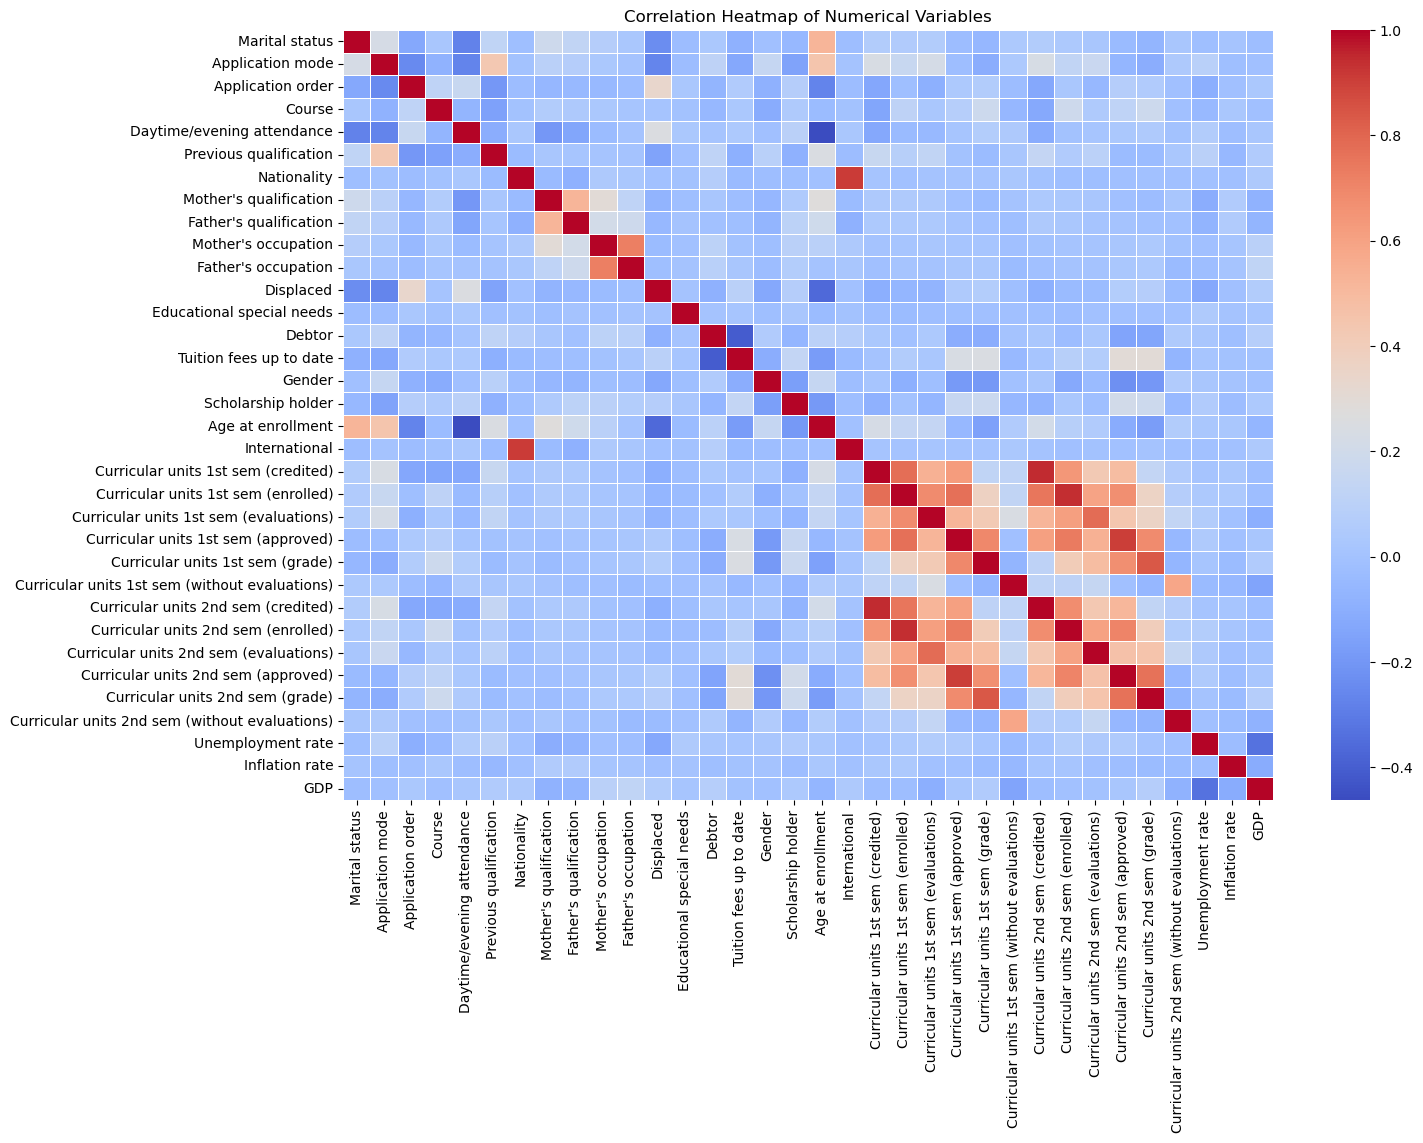

In [20]:
# Select only numeric columns for the correlation
# ensures that only numerical data is used for the correlation, preventing errors
numeric_df = df.select_dtypes(include=['number'])

# Generating the heatmap
# Using the 'coolwarm' palette, will help identify pos or neg relationships
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

*<left><font color="DarkSlateGray">2.6 - Investigating if any Duplicates exist within the Dataset:</font><left>*

In [22]:
# Returns the total number of duplicated rows that are within the df
df.duplicated().sum()

0

*<left><font color="DarkSlateGray">2.7 - Investigating if there are any missing values within the Dataset:</font><left>*

<Axes: >

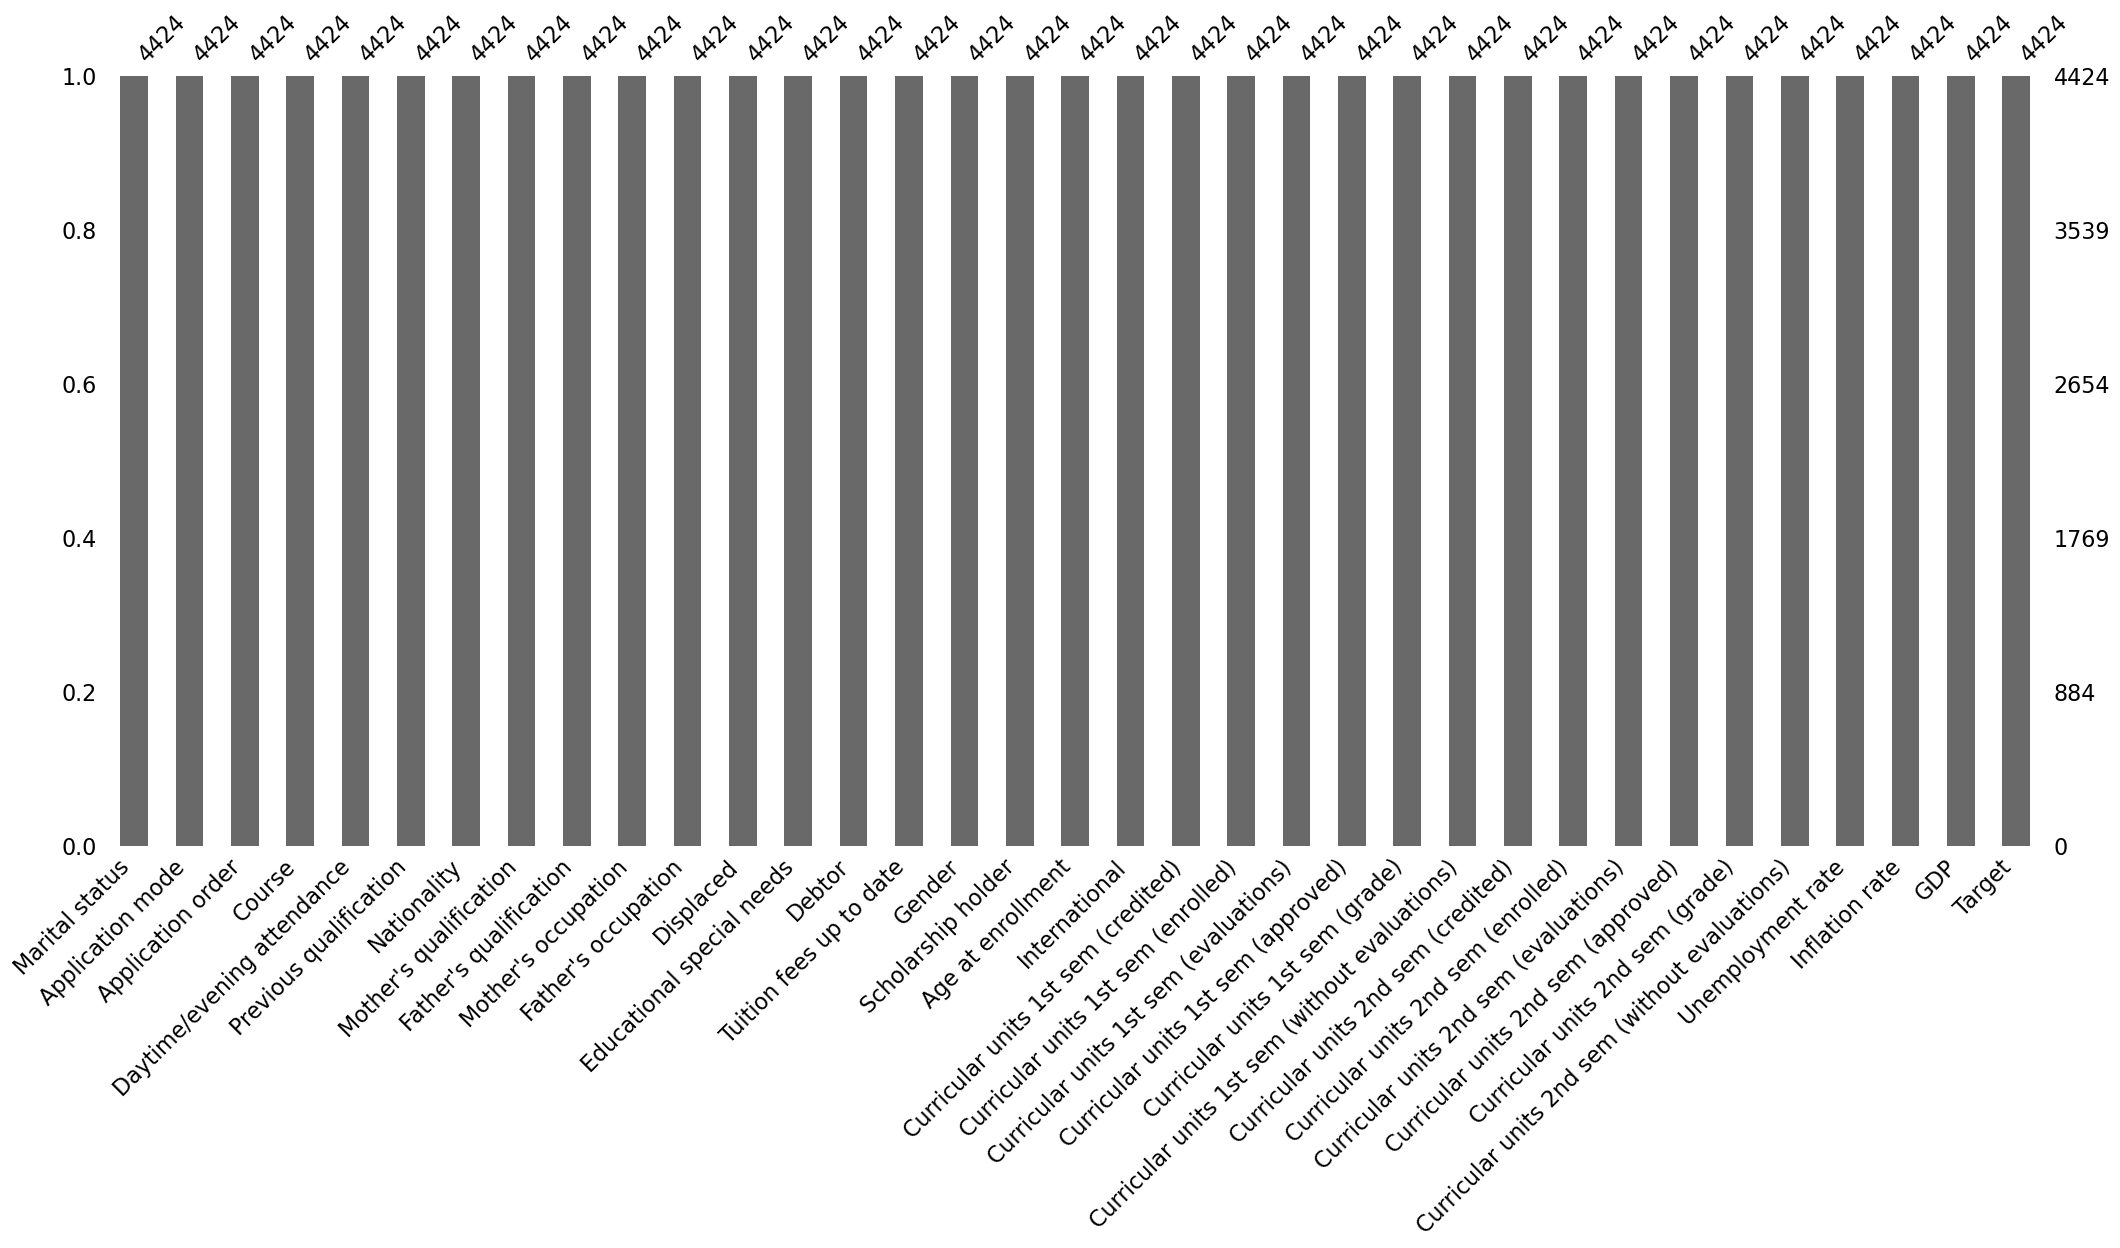

In [24]:
# Generates a bar chart visual that shows the count of non-missing values for each column
msno.bar(df)

*<left><font color="DarkSlateGray">2.8 - Section Conclusion:</font><left>*

- X
- X
- X

## <left><font color = "DarkSlateGray">*3. Data Pre-processing:*</font><left>

*<left><font color="DarkSlateGray">3.1 - Decoding Categorical Variables into Meaningful Representations:</font><left>*

In [37]:
# Mapping categorical codes to meaningful labels
mapping_dict = {
    "Marital status": {1: "Single", 2: "Married", 3: "Widower", 4: "Divorced",
                       5: "Facto Union", 6: "Legally separated"},
    "Course": {1: "Biofuel Production Technologies", 2: "Animation and Multimedia Design",
               3: "Social Service (evening attendance)", 4: "Agronomy", 5:"Communication Design",
               6: "Veterinary Nursing", 7: "Informatics Engineering", 8: "Equiniculture",
               9: "Management", 10: "Social Service", 11: "Tourism", 12: "Nursing", 
               13: "Oral Hygiene", 14: "Advertising and Marketing Management", 15: "Journalism and Communication", 
               16: "Basic Education", 17: "Management (evening attendance)"},
    "Daytime/evening attendance": {1: "Daytime", 0: "Evening"},
    "Previous qualification" : {1: "Secondary education", 2: "Higher education—bachelor’s degree", 
                                3: "Higher education—degree", 4: "Higher education—master’s degree", 
                                5: "Higher education—doctorate", 6: "Frequency of higher education", 
                                7: "12th year of schooling—not completed", 8: "11th year of schooling—not completed", 
                                9: "Other—11th year of schooling", 10: "10th year of schooling", 
                                11: "10th year of schooling—not completed", 12: "Basic education 3rd cycle (9th/10th/11th year) or equivalent", 
                                13: "Basic education 2nd cycle (6th/7th/8th year) or equivalent", 
                                14: "Technological specialization course", 15: "Higher education—degree (1st cycle)", 
                                16: "Professional higher technical course", 17: "Higher education—master’s degree (2nd cycle)"},
    "Nationality": {1: "Portuguese", 2: "German", 3: "Spanish", 4: "Italian", 
                    5: "Dutch", 6: "English", 7: "Lithuanian", 8: "Angolan", 
                    9: "Cape Verdean", 10: "Guinean", 11: "Mozambican", 12: "Santomean", 
                    13: "Turkish", 14: "Brazilian", 15: "Romanian", 16: "Moldova", 
                    17: "Mexican", 18: "Ukrainian", 19: "Russian", 20: "Cuban", 21: "Colombian"},
    "Mother's qualification": {1: "Secondary Education—12th Year of Schooling or Equivalent", 2: "Higher Education—bachelor’s degree",
                               3: "Higher Education—degree", 4: "Higher Education—master’s degree", 5: "Higher Education—doctorate", 
                               6: "Frequency of Higher Education", 7: "12th Year of Schooling—not completed", 8: "11th Year of Schooling—not completed", 
                               9: "7th Year (Old)", 10: "Other—11th Year of Schooling", 11: "2nd year complementary high school course", 12: "10th Year of Schooling",
                               13: "General commerce course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 
                               15: "Complementary High School Course", 16: "Technical-professional course", 17: "Complementary High School Course—not concluded", 
                               18: "7th year of schooling", 19: "2nd cycle of the general high school course", 20: "9th Year of Schooling—not completed", 
                               21: "8th year of schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 
                               24: "Unknown", 25: "Cannot read or write", 26: "Can read without having a 4th year of schooling", 
                               27: "Basic education 1st cycle (4th/5th year) or equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent", 
                               29: "Technological specialization course", 30: "Higher education—degree (1st cycle)", 31: "Specialized higher studies course", 
                               32: "Professional higher technical course",33: "Higher Education—master’s degree (2nd cycle)", 34: "Higher Education—doctorate (3rd cycle)"},
    "Father's qualification": {1: "Secondary Education—12th Year of Schooling or Equivalent", 2: "Higher Education—bachelor’s degree",
                               3: "Higher Education—degree", 4: "Higher Education—master’s degree", 5: "Higher Education—doctorate", 
                               6: "Frequency of Higher Education", 7: "12th Year of Schooling—not completed", 8: "11th Year of Schooling—not completed", 
                               9: "7th Year (Old)", 10: "Other—11th Year of Schooling", 11: "2nd year complementary high school course", 12: "10th Year of Schooling",
                               13: "General commerce course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 
                               15: "Complementary High School Course", 16: "Technical-professional course", 17: "Complementary High School Course—not concluded", 
                               18: "7th year of schooling", 19: "2nd cycle of the general high school course", 20: "9th Year of Schooling—not completed", 
                               21: "8th year of schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 
                               24: "Unknown", 25: "Cannot read or write", 26: "Can read without having a 4th year of schooling", 
                               27: "Basic education 1st cycle (4th/5th year) or equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent", 
                               29: "Technological specialization course", 30: "Higher education—degree (1st cycle)", 31: "Specialized higher studies course", 
                               32: "Professional higher technical course",33: "Higher Education—master’s degree (2nd cycle)", 34: "Higher Education—doctorate (3rd cycle)"},
    "Mother's occupation": {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 
                            3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative staff", 
                            6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries,and Forestry", 
                            8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers",
                            10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 
                            15: "Armed Forces Sergeants", 16: "Other Armed Forces personnel", 17: "Directors of administrative and commercial services", 
                            18: "Hotel, catering, trade, and other services directors", 19: "Specialists in the physical sciences, mathematics, engineering,and related techniques",
                            20: "Health professionals", 21: "Teachers", 22: "Specialists in finance, accounting, administrative organization,and public and commercial relations", 
                            23: "Intermediate level science and engineering techniciansand professions", 24: "Technicians and professionals of intermediate level of health", 
                            25: "Intermediate level technicians from legal, social, sports, cultural,and similar services", 
                            26: "Information and communication technology technicians", 27: "Office workers, secretaries in general, and data processing operators", 
                            28: "Data, accounting, statistical, financial services, and registry-related operators", 
                            29: "Other administrative support staff", 30: "Personal service workers", 31: "Sellers", 32: "Personal care workers and the like", 
                            33: "Protection and security services personnel", 34: "Market-oriented farmers and skilled agricultural and animal production workers", 
                            35: "Farmers, livestock keepers, fishermen, hunters and gatherers,and subsistence", 
                            36: "Skilled construction workers and the like, except electricians", 37: "Skilled workers in metallurgy, metalworking, and similar", 
                            38: "Skilled workers in electricity and electronics", 39: "Workers in food processing, woodworking, and clothing and other industries and crafts", 
                            40: "Fixed plant and machine operators", 41: "Assembly workers", 42: "Vehicle drivers and mobile equipment operators", 
                            43: "Unskilled workers in agriculture, animal production, and fisheries and forestry", 
                            44: "Unskilled workers in extractive industry, construction,manufacturing, and transport", 
                            45: "Meal preparation assistants",  46: "Street vendors (except food) and street service providers"},
    "Fathers's occupation": {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 
                            3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative staff", 
                            6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries,and Forestry", 
                            8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers",
                            10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 
                            15: "Armed Forces Sergeants", 16: "Other Armed Forces personnel", 17: "Directors of administrative and commercial services", 
                            18: "Hotel, catering, trade, and other services directors", 19: "Specialists in the physical sciences, mathematics, engineering,and related techniques",
                            20: "Health professionals", 21: "Teachers", 22: "Specialists in finance, accounting, administrative organization,and public and commercial relations", 
                            23: "Intermediate level science and engineering techniciansand professions", 24: "Technicians and professionals of intermediate level of health", 
                            25: "Intermediate level technicians from legal, social, sports, cultural,and similar services", 
                            26: "Information and communication technology technicians", 27: "Office workers, secretaries in general, and data processing operators", 
                            28: "Data, accounting, statistical, financial services, and registry-related operators", 
                            29: "Other administrative support staff", 30: "Personal service workers", 31: "Sellers", 32: "Personal care workers and the like", 
                            33: "Protection and security services personnel", 34: "Market-oriented farmers and skilled agricultural and animal production workers", 
                            35: "Farmers, livestock keepers, fishermen, hunters and gatherers,and subsistence", 
                            36: "Skilled construction workers and the like, except electricians", 37: "Skilled workers in metallurgy, metalworking, and similar", 
                            38: "Skilled workers in electricity and electronics", 39: "Workers in food processing, woodworking, and clothing and other industries and crafts", 
                            40: "Fixed plant and machine operators", 41: "Assembly workers", 42: "Vehicle drivers and mobile equipment operators", 
                            43: "Unskilled workers in agriculture, animal production, and fisheries and forestry", 
                            44: "Unskilled workers in extractive industry, construction,manufacturing, and transport", 
                            45: "Meal preparation assistants",  46: "Street vendors (except food) and street service providers"},
    "Displaced": {1: "Yes", 0: "No"},
    "Educational special needs": {1: "Yes", 0: "No"},
    "Debtor": {1: "Yes", 0: "No"},
    "Tuition fees up to date": {1: "Yes", 0: "No"},
    "Gender": {1: "Male", 0: "Female"},
    "Scholarship holder": {1: "Yes", 0: "No"},
    "International": {1: "Yes", 0: "No"}
}

# Apply the mapping changes to categorical columns
for column, mapping in mapping_dict.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

# Display the changes
df.head()

Marital status  Application mode  Application order  \
0         Single                 8                  5   
1         Single                 6                  1   
2         Single                 1                  5   
3         Single                 8                  2   
4        Married                12                  1   

                                Course Daytime/evening attendance  \
0      Animation and Multimedia Design                    Daytime   
1                              Tourism                    Daytime   
2                 Communication Design                    Daytime   
3         Journalism and Communication                    Daytime   
4  Social Service (evening attendance)                    Evening   

  Previous qualification Nationality  \
0    Secondary education  Portuguese   
1    Secondary education  Portuguese   
2    Secondary education  Portuguese   
3    Secondary education  Portuguese   
4    Secondary education  Portuguese   

                              Mother's qualification  \
0                            General commerce course   
1  Secondary Education—12th Year of Schooling or ...   
2      General Course of Administration and Commerce   
3        Supplementary Accounting and Administration   
4      General Course of Administration and Commerce   

                              Father's qualification  \
0                       Other—11th Year of Schooling   
1                            Higher Education—degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                 Mother's occupation  ...  \
0  Personal Services, Security and Safety Workers...  ...   
1     Intermediate Level Technicians and Professions  ...   
2                                  Unskilled Workers  ...   
3  Personal Services, Security and Safety Workers...  ...   
4                                  Unskilled Workers  ...   

   Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled)  \
0                                    0                                   0   
1                                    0                                   6   
2                                    0                                   6   
3                                    0                                   6   
4                                    0                                   6   

  Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved)  \
0                                      0                                   0   
1                                      6                                   6   
2                                      0                                   0   
3                                     10                                   5   
4                                      6                                   6   

  Curricular units 2nd sem (grade)  \
0                         0.000000   
1                        13.666667   
2                         0.000000   
3                        12.400000   
4                        13.000000   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              10.8   
1                                              0              13.9   
2                                              0              10.8   
3                                              0               9.4   
4                                              0              13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

## <left><font color = "DarkSlateGray">*4. Exploratory Data Analysis:*</font><left>

In [39]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

*<left><font color="DarkSlateGray">4.1 - Value Counts:</font><left>*

In [41]:
print(df['Marital status'].value_counts())

Marital status
Single               3919
Married               379
Divorced               91
Facto Union            25
Legally separated       6
Widower                 4
Name: count, dtype: int64


In [43]:
print(df['Course'].value_counts())

Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equiniculture                           141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64


In [45]:
print(df['Daytime/evening attendance'].value_counts())

Daytime/evening attendance
Daytime    3941
Evening     483
Name: count, dtype: int64


In [47]:
print(df['Nationality'].value_counts())

Nationality
Portuguese      4314
Brazilian         38
Santomean         14
Cape Verdean      13
Spanish           13
Guinean            5
Moldova            3
Italian            3
Ukrainian          3
Angolan            2
Mexican            2
Romanian           2
Mozambican         2
German             2
Russian            2
Turkish            1
Dutch              1
Colombian          1
Cuban              1
English            1
Lithuanian         1
Name: count, dtype: int64


In [49]:
print(df['International'].value_counts())

International
No     4314
Yes     110
Name: count, dtype: int64


In [51]:
print(df['Gender'].value_counts())

Gender
Female    2868
Male      1556
Name: count, dtype: int64


In [53]:
print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


*<left><font color="DarkSlateGray">4.2- Target Vairiable Distribution:</font><left>*

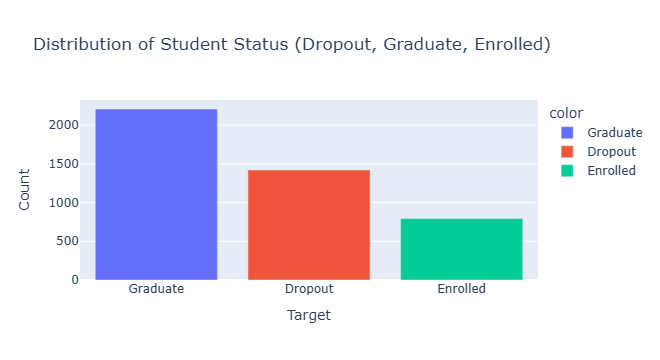

In [55]:
fig = px.bar(df['Target'].value_counts(), 
             title = "Distribution of Student Status (Dropout, Graduate, Enrolled)",
             labels = {'index':"Student Status", 'value':"Count"},
             color = df['Target'].value_counts().index)

fig.show()

*<left><font color="DarkSlateGray">4.3 - Dropout Rate by Marital Status:</font><left>*

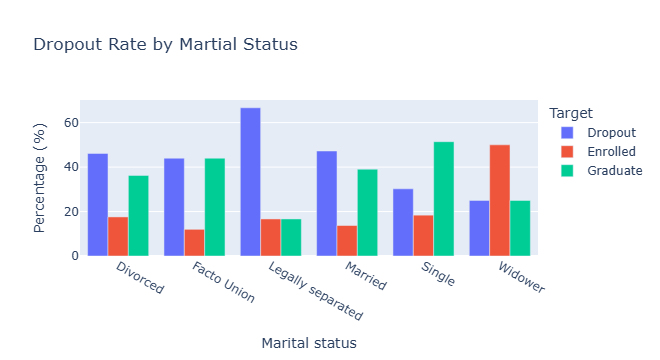

In [61]:
fig = px.bar(df.groupby("Marital status")["Target"].value_counts(normalize=True).mul(100).unstack(), 
             title = "Dropout Rate by Martial Status", 
             labels = {"value": "Percentage (%)"},
             barmode = "group")

fig.show()

*<left><font color="DarkSlateGray">4.4 - Dropout -vs- Financial Status (Scholarship & Debtor):</font><left>*

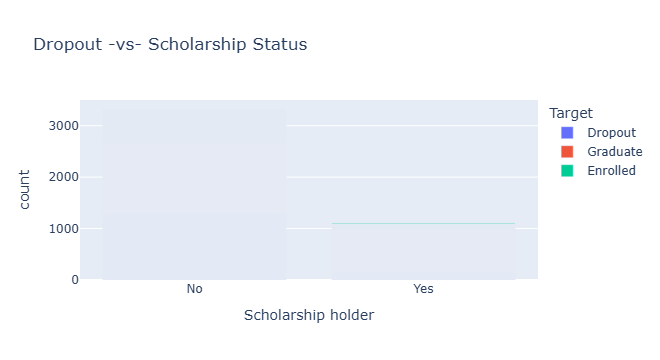

In [64]:
fig = px.bar(df, x = "Scholarship holder", color = "Target", 
             title = "Dropout -vs- Scholarship Status",
             barmode = "stack")

fig.show()

*<left><font color="DarkSlateGray">4.5 - X:</font><left>*

*<left><font color="DarkSlateGray">4.6 - X:</font><left>*

*<left><font color="DarkSlateGray">4.7 - X:</font><left>*

*<left><font color="DarkSlateGray">4.8 - X:</font><left>*

*<left><font color="DarkSlateGray">4.9 - X:</font><left>*

*<left><font color="DarkSlateGray">4.10 - X:</font><left>*

*<left><font color="DarkSlateGray">4.11 - X:</font><left>*

## <left><font color = "DarkSlateGray">*4. Satisitcal Analysis:*</font><left>

*<left><font color="DarkSlateGray">4.1 - X:</font><left>*

*<left><font color="DarkSlateGray">4.2 - X:</font><left>*

*<left><font color="DarkSlateGray">4.3 - X:</font><left>*

*<left><font color="DarkSlateGray">4.4 - X:</font><left>*

## <left><font color = "DarkSlateGray">*5. X:*</font><left>

*<left><font color="DarkSlateGray">5.1 - X:</font><left>*

*<left><font color="DarkSlateGray">5.2 - X:</font><left>*

*<left><font color="DarkSlateGray">5.3 - X:</font><left>*

*<left><font color="DarkSlateGray">5.4 - X:</font><left>*